In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [3]:
df = pd.read_csv(Path('/home/gfindlay/Documents/ecephys_analyses/notebooks/SPWs/Analysis/generate-dataframes/spw-incidence.csv'))

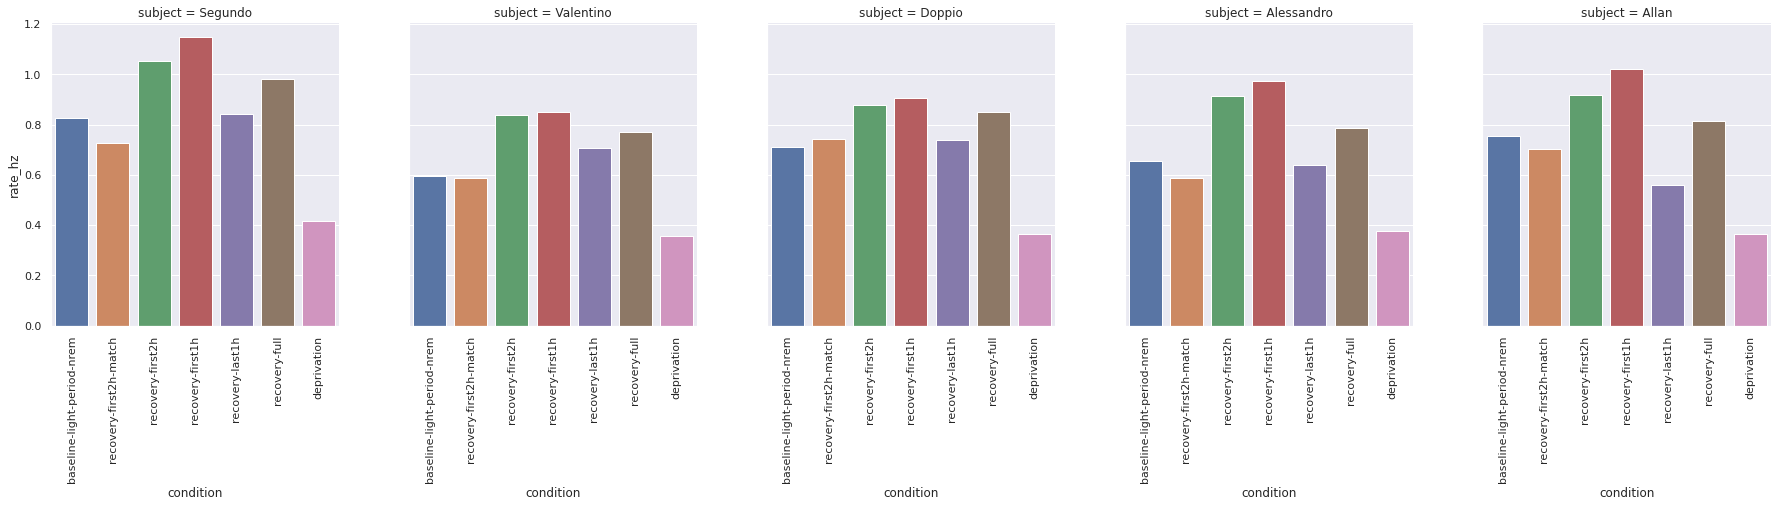

In [4]:
g = sns.catplot(data=df, col='subject', x='condition', y='rate_hz', kind='bar')
g.set_xticklabels(rotation=90)

In [5]:
norms = df.set_index(['subject', 'condition']).xs((slice(None), 'baseline-light-period-nrem')).rate_hz
normed_rates = df.set_index(['subject', 'condition']).rate_hz / norms * 100
normed_rates = normed_rates.rename('normalized_rate')
normed_rates_df = normed_rates.to_frame().reset_index()

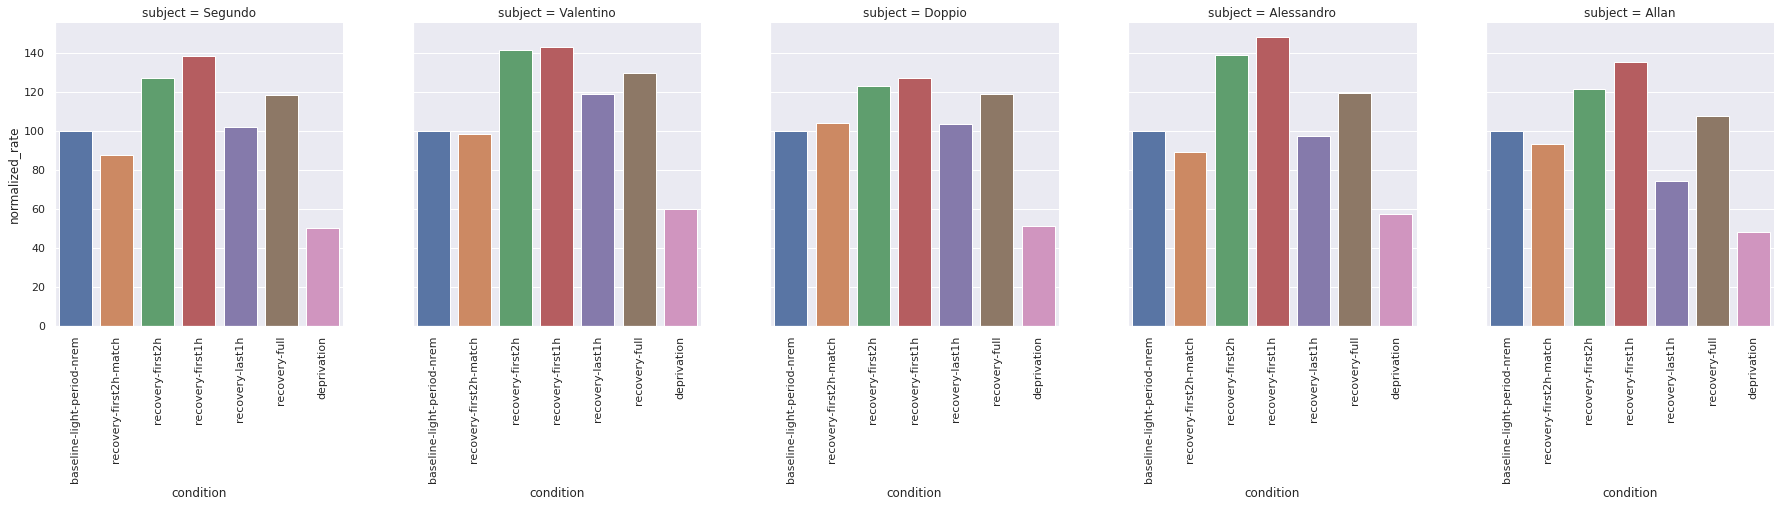

In [6]:
g = sns.catplot(data=normed_rates_df, col='subject', x='condition', y='normalized_rate', kind='bar')
g.set_xticklabels(rotation=90)

In [7]:
rebounds = normed_rates[:, 'recovery-first2h'] - normed_rates[:, 'recovery-first2h-match']
print(rebounds)
print(stats.ttest_1samp(rebounds, 0))

subject
Segundo       39.636266
Valentino     42.741781
Doppio        18.671828
Alessandro    49.821522
Allan         28.482997
Name: normalized_rate, dtype: float64
Ttest_1sampResult(statistic=6.514466181741195, pvalue=0.002866261599447613)


In [8]:
declines = normed_rates[:, 'recovery-first1h'] - normed_rates[:, 'recovery-last1h']
print(declines)
print(stats.ttest_1samp(declines, 0))

subject
Segundo       36.826801
Valentino     24.163213
Doppio        23.444180
Alessandro    50.889319
Allan         61.296150
Name: normalized_rate, dtype: float64
Ttest_1sampResult(statistic=5.290940065227943, pvalue=0.006124587968207601)


r: 0.1937240476580035
p: 0.7548944847301197


<AxesSubplot:xlabel='normalized_rate', ylabel='normalized_rate'>

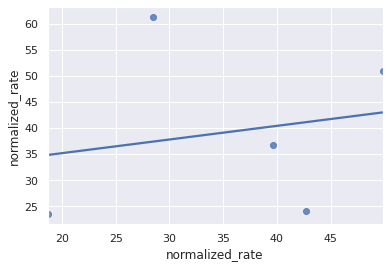

In [9]:
r, p = stats.pearsonr(rebounds, declines)
print(f'r: {r}')
print(f'p: {p}')
sns.regplot(x=rebounds, y=declines, ci=None)